## 2. Simulate 3D tropospheric turbulence based on the fractal/power-law surface ##

Reference: Hanssen, 2001, Chap. 4.7

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
from mintpy.objects import timeseries
from mintpy.utils import readfile, writefile, utils as ut
from mintpy.simulation import fractal

work_dir = os.path.expanduser('~/development/python/Yunjun_et_al-2019')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

ref_file = os.path.expanduser('~/insarlab/Galapagos/AlcedoSenDT128/mintpy/timeseriesResidual_ramp.h5')
ts_obj = timeseries(ref_file)
ts_obj.open()
step = abs(ut.range_ground_resolution(ts_obj.metadata))

Go to directory: /Users/yunjunz/development/python/Yunjun_et_al-2019
open timeseries file: timeseriesResidual_ramp.h5


C0 = 0.007167, beta = 2.083, Fractal dim = 3.0


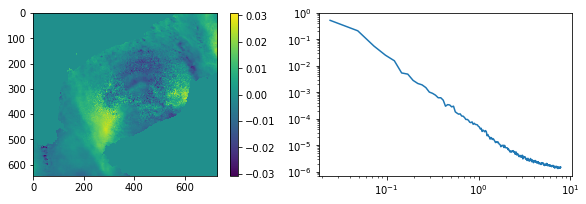

C0 = 0.007417, beta = 2.634, Fractal dim = 2.7


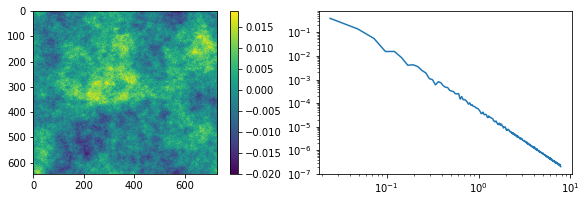

(0.007416860154034338, 2.634001776152757, 2.682999111923621)

In [2]:
## 2D tropospheric turbulence (from an existing residual phase)
# get power scaling factor from real data
ref_data = readfile.read(ref_file, datasetName=ts_obj.dateList[4])[0]
p0 = fractal.check_power_spectrum_1d(ref_data, resolution=step, display=True)[0]
# simulate tropospheric turbulence
trop = fractal.fractal_surface_atmos(shape=ref_data.shape, resolution=step, p0=p0)
# check the power spectrum of simulated data
fractal.check_power_spectrum_1d(trop, resolution=step, display=True)

In [3]:
## 3D tropospheric turbulence
out_file = 'sim_tropTurbulence.h5'
if not os.path.isfile(out_file):
    print('simulating tropospheric turbulence ...')
    # read reference data
    ref_data = readfile.read(ref_file)[0]
    # sim trop turbulence
    trop_data = np.zeros(ref_data.shape, np.float32)
    num_date = ref_data.shape[0]
    for i in range(num_date):
        sys.stdout.write('\r{}/{}'.format(i+1, num_date))
        sys.stdout.flush()
        p0 = fractal.check_power_spectrum_1d(ref_data[i, :, :], resolution=step, display=False)[0]
        trop = fractal.fractal_surface_atmos(shape=ref_data.shape[-2:], resolution=step, p0=p0)
        trop_data[i, :, :] = trop
    # reference to 1st date
    trop_data -= np.tile(trop_data[0,:,:], (num_date, 1, 1))
    #write to file
    writefile.write(trop_data, out_file=out_file, ref_file=ref_file)
    print('\nsave simulated 3D turbulence to file', out_file)
print('Done.')

simulating tropospheric turbulence ...
98/98create timeseries HDF5 file: sim_tropTurbulence.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=None
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to sim_tropTurbulence.h5

save simulated 3D turbulence to file sim_tropTurbulence.h5
Done.
